In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
 
from matplotlib import pyplot as plt
from scipy import stats
 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
california_housing = fetch_california_housing(as_frame=True)

### 1. Получите данные и загрузите их в рабочую среду.

In [20]:
df = california_housing.frame
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


#### 2а. Проверте данные на пропуски. Удалите в случае обнаружения

In [22]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [23]:
# Данные не содержат пропусков

#### 2b. Нормализуйте один из признаков

In [24]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(df[['Population', 'AveOccup']])

<Axes: >

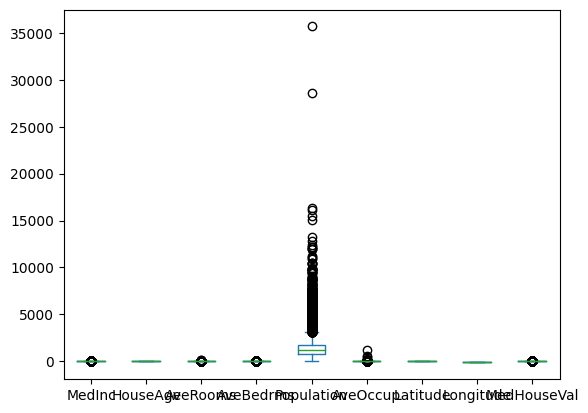

In [25]:
df.plot(kind='box')

In [26]:
df['Population']=scaler.transform(df[['Population','AveOccup']])[:,0]
# df['AveOccup']=scaler.transform(df[['Population','AveOccup']])[:,1]
# df['AveOccup']=scaler.transform(df[['AveOccup']])

<Axes: >

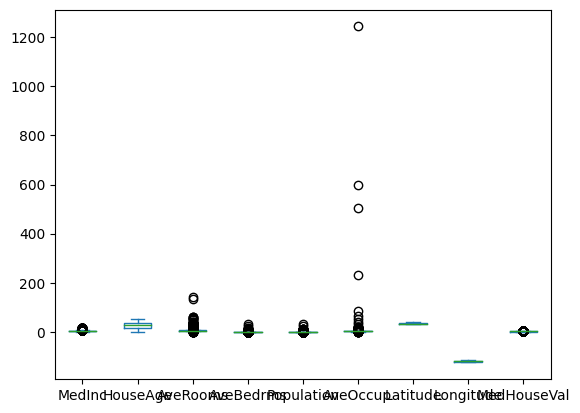

In [27]:
df.plot(kind='box')

### 3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое

In [28]:
X = df[list(df.columns)[:-3]]
X
y =  df[list(df.columns)[-1]]
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Обучите модель регрессии на обучающем множетсве.

In [60]:
model = LinearRegression().fit(X_train, y_train)
model.score(X_train, y_train)

0.5459161602818385

### 5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score

In [31]:
model_test = LinearRegression().fit(X_test,y_test)
model_test.score(X_test,y_test)

0.528462742952506

### 6. Обучите дерево решений на обучающем множестве. 

In [32]:
from sklearn.tree import DecisionTreeClassifier



In [56]:
from sklearn.tree import DecisionTreeClassifier

lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)
clf = DecisionTreeClassifier(random_state=1,max_depth=2)
clf.fit(X[['MedInc','Population']], y_transformed)

DecisionTreeClassifier(max_depth=2, random_state=1)

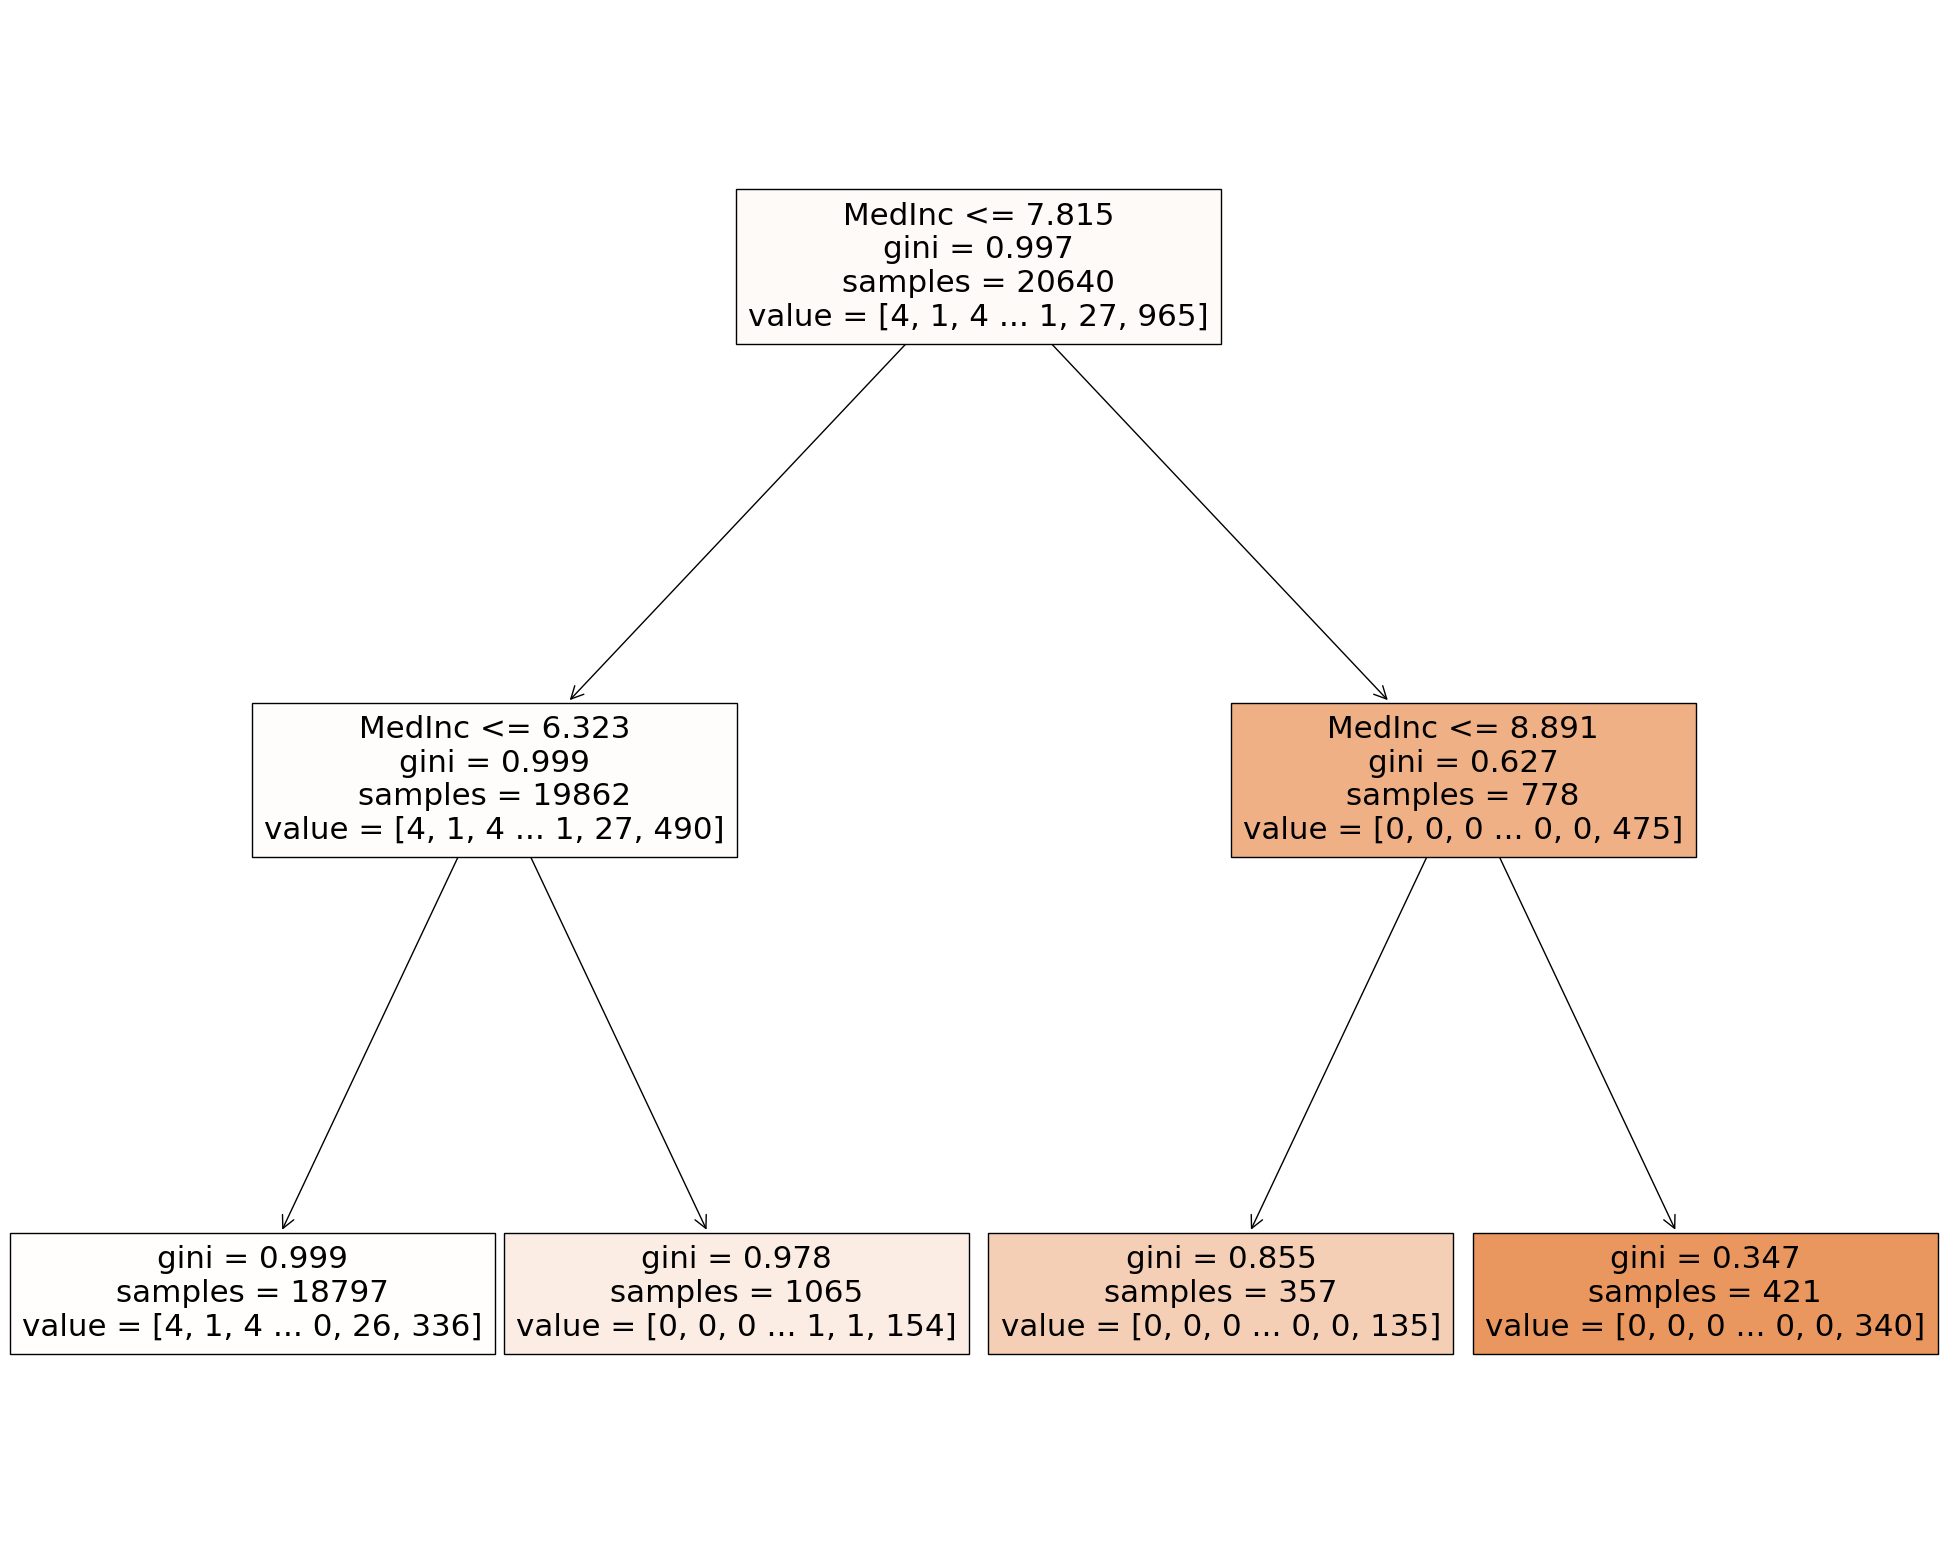

In [57]:
plt.figure(figsize=(25,20))
plot_tree(clf, feature_names=X[['MedInc','Population']].columns, filled=True);

### 7. Оптимизируйте глубину дерева. 

In [58]:
clf = DecisionTreeClassifier(random_state=1,max_depth=3, criterion='entropy')
clf.fit(X[['MedInc','Population']], y_transformed)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

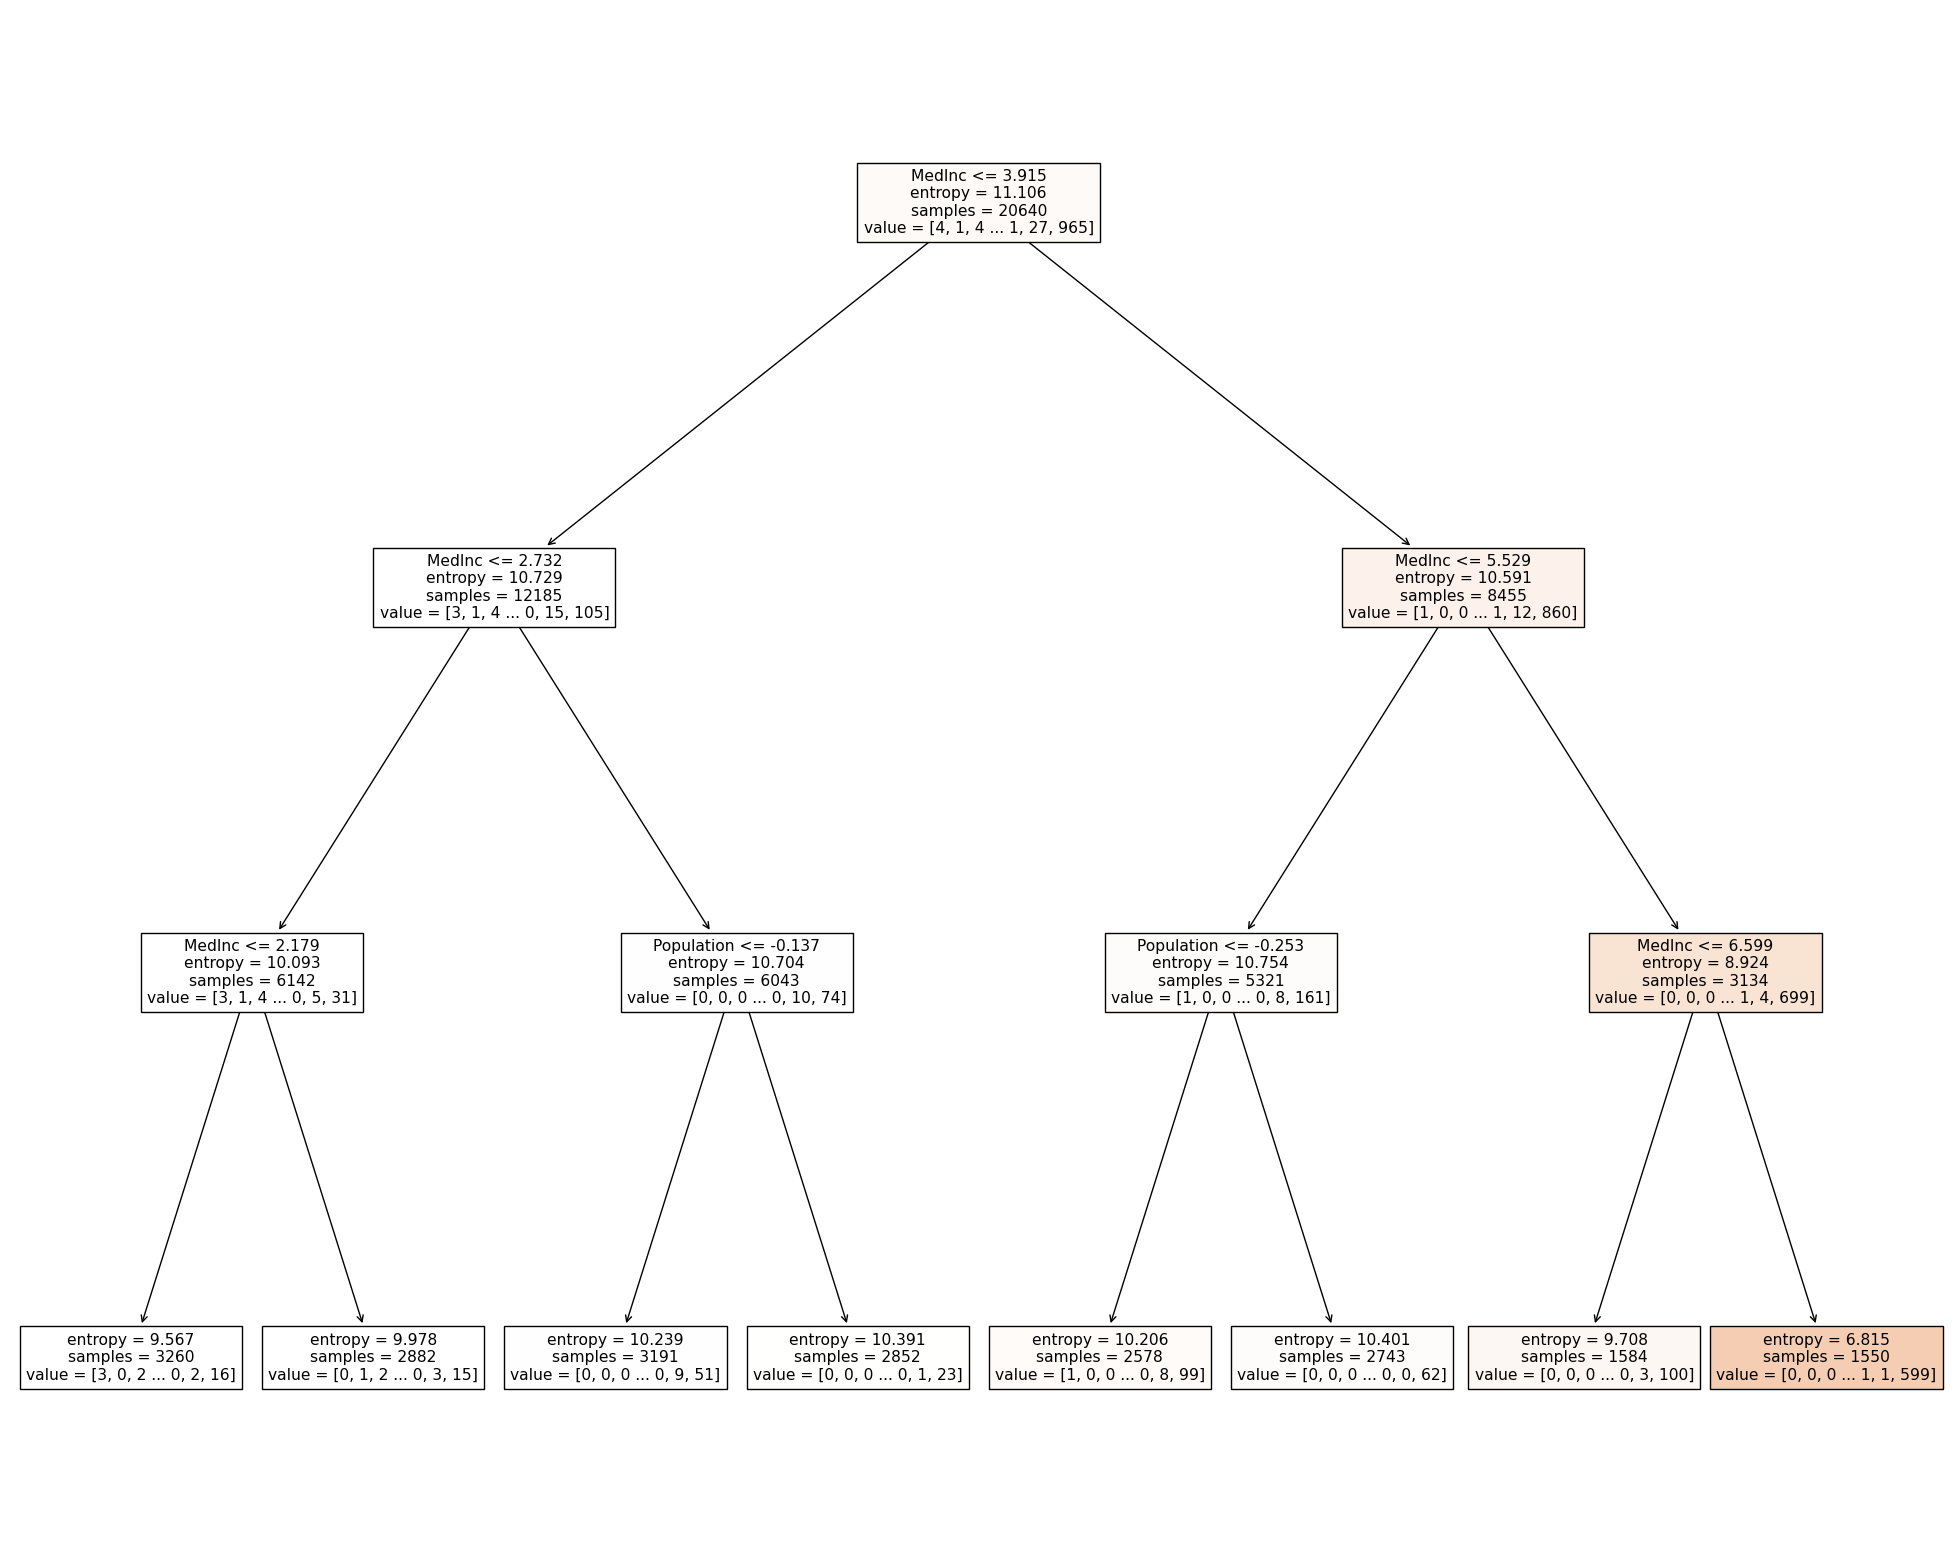

In [59]:
plt.figure(figsize=(25,20))
plot_tree(clf, feature_names=X[['MedInc','Population']].columns, filled=True);

### 8. Cформулируйте выводы

Для обучающих данных получалась более точная модель, что довольно предсказуемо.
При построении дерева решений были выбраны два критерия, на мой взгляд, самые значимые.